# Hypothesis Testing

**1. Introduction**

Hypothesis testing indicates a scientific method proving whether a certain assumption stated in the form of hypothesis is true or not. In a common format, there are two competing hypothesis called null and alternative hypothesis. The null hypothesis is usually an assumption that needs to be challenged, and the alternative hypothesis is an opposite to the null hypothesis.

Then, what is the criteria of rejecting or not rejecting the null hypothesis? It is  p-value. The p-value is a measure indicating the deviation of your sample mean from the hypothesized mean value by the null hypothesis. The lower the p-value is, the lower the probability of the sampled data to appear under the conditions suggested by the null hypothesis is. Thus, we reject the null hypothesis only when the sampled data shows extreme mean value (=lower p-value) that looks almost improbable to appear if our null hypothesis is a scientific truth and we do the perfect random sampling. 

The academia generally considers the sample mean inducing p-value less than 0.05 as an extreme value, thus we call 0.05 as significant level. When we get p-value less than 0.05, we call it as statistically siginificant difference. If your sample data's p-value is less than 0.05, your null hypothesis will be rejected and your alternative hypothesis will be automatically recognized as new tentative truth. 

Then, let's calculate the p-value of your sample data step by step with an example

**2. Example Scenario**

Our hypothesized situation is calculating weight of new born babies. Thus, our population is the new born babies, population parameter is the average weight of the new born babies. We are interested in whether the average weight of the new born babies are 3kg or not. Thus, our null hypothesis and alternative hypothesis per se are as follows:

    H0: Average weight of new born babies = 3kg(mu=3)
    Ha: Average weight of new born babies =/3kg(mu=/3)
To test the hypothesis above, we collected 36 sample data from the new born babies through a random sampling. The sample mean was 2.92 and standard deviation was 0.17.

There are three different types of hypothesis testing, two-tailed, lower-tailed, and upper-tailed testing. **Our example above is two-tailed testing.** The two-tailed testing is only interested in proving whether your sample mean is different from the hypothesized value or not. It does not care about the negative or positive difference in sample mean minus hypothesized value. 

<div>
<img src="two_tail.png" width="800"/>
</div>

In [ ]:
# Our input values introduced above can be defined as bellow in the code
hv=3 # hypothesized value: the value we'd like to test whether it is true of not
m=2.92 # sample mean
sd=0.17 # sample standard deviation
n=36 # sample size
degf=n-1 #Degree of freedom

**3. How to calculate p-value**

**STEP1**

The first step is accepting the null hypothesis as tentative truth until you will find the significant evidence to reject your null hypothesis. What does that mean? You will draw the population distribution with the normal t- or z- distribution and put the hypothesized value as the center(mean) of the distribution. It requires you to convert your raw values into t or z score. Let's take a look at the example code and output.

The figure indicates the hypothesized t-distribution of your population according to the null hypothesis. Now we assume that our population distribution looks like this. In t-distribution, your hypothesized value at the center is converted to zero.

Text(0.5, 1.0, 'Sample Distribution')

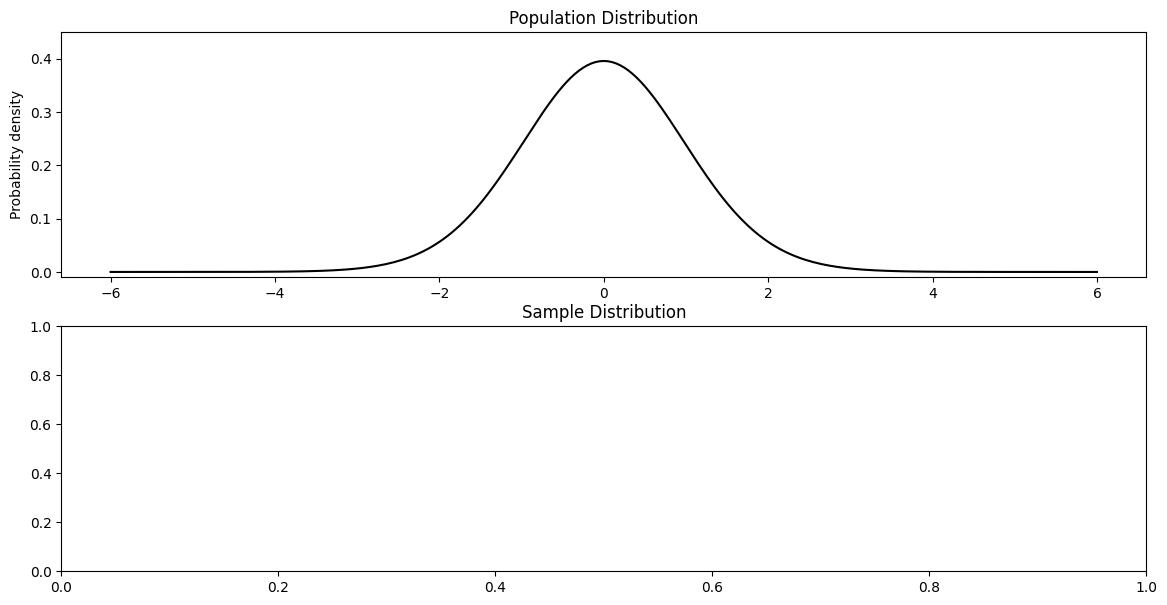

In [111]:
# Create your population distribution using t-distribution.
df = 35
fx = [-1.68, 0, 1.68]
fy = st.t.pdf(fx, df)
x = np.arange(-6, 6.01, 0.05)
yy = st.t.pdf(x, df)

## General Setting for the Plot Grid
fig, ax = plt.subplots(2, 1, figsize=(14, 7))
#plt.title("Area under the curve for $j_i$")

ax[0].plot(x, yy, color="black")
ax[0].set_title("Population Distribution")
ax[0].set_ylim(-0.01, 0.45)
ax[0].set_ylabel("Probability density")

ax[1].set_title("Sample Distribution")

**STEP2**

The second step is defining 'the significant evidence to reject your null hypothesis'. The significant evidence is the extreme mean value distanced far away from the hypothesized value, and it is called "significance level(alpha)". Then, what is the extreme value distanced far away from the hypothesized value? The best practice in the statistical field is more than 2 standard deviation from the hypothesized mean, which is 0-2.5% and 97.5-100% at the two tailed, 0-5% at the lower tailed, 95-100% at the upper tailed. The size underneath of the curve given the extreme value is called the p-value and we usually set 0.05 of p-value as sigificant evidence to reject the null hypothesis.

Thus, when your sample mean indicates the t value extremely unlikely to happen given the population mean and distribution, that is, if your sample mean causes less than or more than 0.05 p-value, you will reject the null hypothesis. That is because your sample mean's probability to appear given the normal population distribution is less than 5%, and we don't think it is likely to happen when you do the perfect random sampling with enough size of samples(at minimum 30 samles). 

In the two-tailed testing, we divide the significant level 0.05 into half for lower and upper tail, which means that it is more difficult to reject the null hypothesis as the value recognized as extreme is much higher or lower on either side. We usually double the cacluated p-value for the two-tailed testing to make it much difficult to be less than 0.05 significant level and reject the null hypothesis.


[0.02500576 0.5        0.97499424]


Text(0.5, 1.0, 'Sample Distribution')

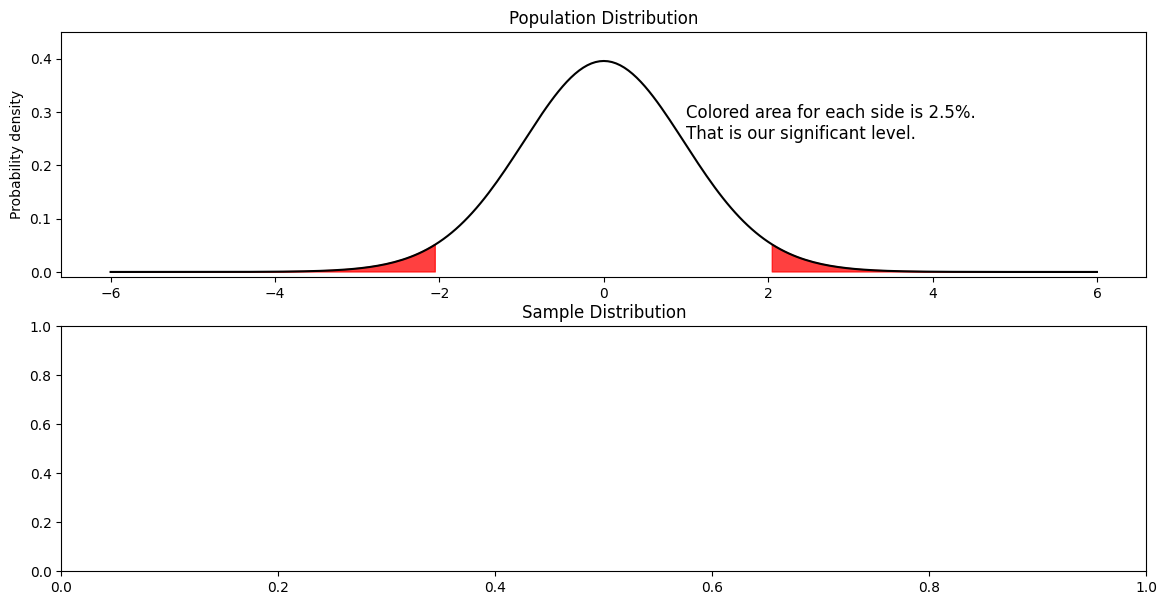

In [144]:

# General input
df = 35

# Pop. Dist Input
fx = [-2.03, 0, 2.03]
fy = st.t.pdf(fx, df)
out1 = 1-st.t.cdf(t, df=df)
out2 = st.t.cdf(fx, df=df)
x = np.arange(-6, 6.01, 0.05)
yy = st.t.pdf(x, df)

print(out2)
## General Setting for the Plot Grid
fig, ax = plt.subplots(2, 1, figsize=(14, 7))
#plt.title("Area under the curve for $j_i$")

## Plot 1
ax[0].plot(x, yy, color="black")
ax[0].set_title("Population Distribution")
ax[0].set_ylim(-0.01, 0.45)
ax[0].set_ylabel("Probability density")
ax[0].fill_between(
    x=x,
    y1=yy,
    where=(x >= fx[2]) | (x <=fx[0]),
    color="red",
    alpha=0.75,
)
ax[0].text(
    1,
    0.25,
    f"Colored area for each side is {round((1-out2[2])*100,1)}%. \nThat is our significant level.",
    fontsize=12,
)
ax[1].set_title("Sample Distribution")

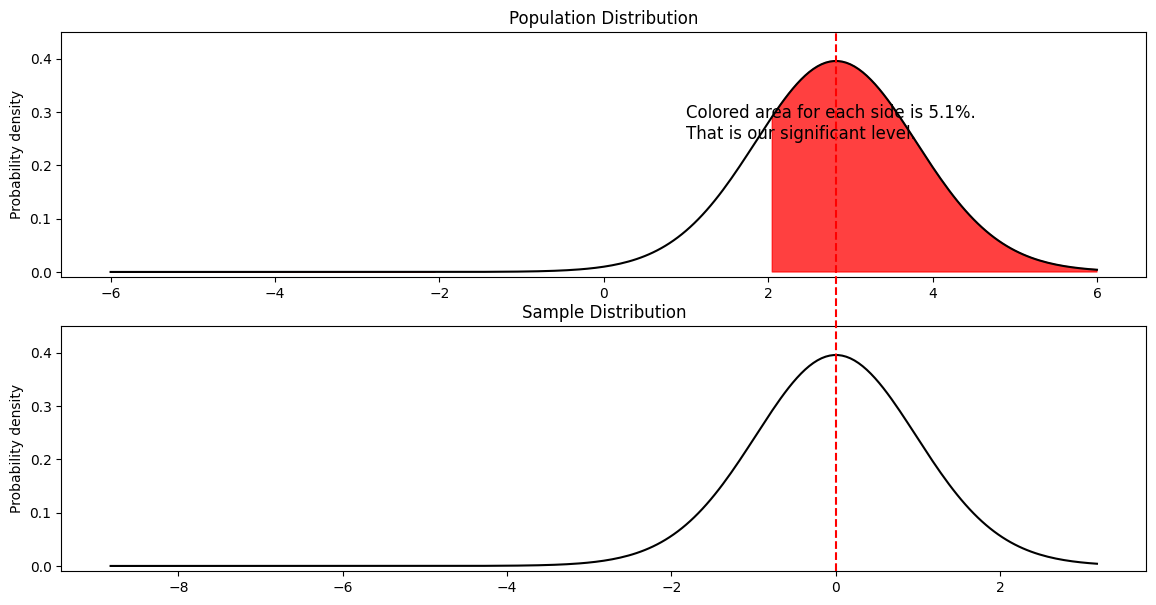

In [151]:
## General input
df = 35
## sample input

sx = [1.68, 0, 1.68]
sy = st.t.pdf(fx, df)
outs1 = 1-st.t.cdf(t, df=df)
outs2 = st.t.cdf(fx, df=df)
x = np.arange(-6, 6.01, 0.05)
x1 = np.arange(-6-t, 6.01-t,0.05)
yy = st.t.pdf(x1, df)

## General Setting for the Plot Grid
fig, ax = plt.subplots(2, 1, figsize=(14, 7))
#plt.title("Area under the curve for $j_i$")

## Plot 1
ax[0].plot(x, yy, color="black")
ax[0].set_title("Population Distribution")
ax[0].set_ylim(-0.01, 0.45)
ax[0].set_ylabel("Probability density")
ax[0].fill_between(
    x=x,
    y1=yy,
    where=(x >= fx[2]) | (x <=fx[0]),
    color="red",
    alpha=0.75,
)
ax[0].text(
    1,
    0.25,
    f"Colored area for each side is {round((1-out2[2])*100,1)}%. \nThat is our significant level.",
    fontsize=12,
)
ax[1].set_title("Sample Distribution")

## Plot 2
ax[1].plot(x1, yy, color="black")
ax[1].set_ylim(-0.01, 0.45)
ax[1].set_ylabel("Probability density")
#ax.vlines(x=t, ymin=0, ymax=0.1, color="red", linestyle="--")

### Add vertical line across the plots
# background axes object for plotting the vertical line
ax =  fig.add_subplot(sharex = ax[0])
# set background color to transparent and turn off the frame
ax.patch.set_alpha(0)
ax.axis("off")
# plot the vertical line
ax.axvline(t, c='r', linestyle="--")

In [24]:
# Calculate t-value of you
out1 = 1-st.t.cdf(t, df=df)
out2 = st.t.cdf(fx, df=df)
t=abs(m-hv)/(sd/np.sqrt(n))
print(t)

2.8235294117647083


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

2. Types of Hypothesis Testing

2.1. Two Tail Testing

Two tail testing's mathematical notation for the null and alternative hypothesis testing looks like this. What does it mean by two-tail testing? It means you will reject your null hypothesis whatever extreme or significant p value on both lower or upper side of hypothesized value in the population distribution.

mu = population value
hv = hypothesized value

H0: mu=hv
Ha: mu=/hv



In [59]:
(1 - st.t.cdf(abs(t), degf))*2

0.007785446023753417

In [44]:
# Left Tail Example

# Set your input values to calculate t value
# Set your significant level: 0.025 and two tail
# Calculate degree of freedom: n-1
hv=3
m=2.92
sd=0.17
n=36
degf=n-1
t=abs(m-hv)/(sd/np.sqrt(n))
#t_value=st.t.ppf(q=0.95,df=degf)
print(t_value,t)


1.6895724539637709 2.8235294117647083


In [51]:
# Single tail testing:
print(t)
st.t.sf(np.abs(t), df=degf)*2

2.8235294117647083


0.007785446023753477

In [52]:

(1 - st.t.cdf(abs(2.824), degf))

0.003888088175250659